In [54]:
import numpy as np
import pymesh
from glob import glob
from sklearn import preprocessing
import math
import pandas as pd
import matplotlib.pyplot as plt
import re

In [55]:
fs_mesh = np.array(sorted(glob("./out/torsos_smooth/*.ply")))

In [56]:
#ids = ["002","004","001","005","006","009","010","011","012","013","015","016","017","018","019","020","021","024","025","026","028","030","033","034","035","036","038","039","041","042","043","044","045","046","047","048","049","050","051","052","053","054","055","056","058","059","061","062","063","064","065","067","069","070","071","073","074","075","076","078","079","080","081","082","084","085","086","087","088","089","090","091","092","094","097","098","100","101","103","104","105","106","107","108","110","112","113","114","115","117","118","120","121","122","123","124","125","127","128","130","135","136","137","138","139","141","142","143","145","146","147","148","149","150","151","153","154"]
#import re
#ids = map(lambda x: re.findall(r'\d+',x)[0] ,fs_mesh)
ids = []

In [57]:
len(ids)

0

In [58]:
def distance2D(a, b):
    return math.sqrt( ((b[0]-a[0])**2)  + ((b[1]-a[1])**2) )

In [59]:
fetas =[]
for mesh_f in fs_mesh[:]:
    print(mesh_f)
    if mesh_f == "./out/torsos_smooth/model_mesh_045.ply"  or mesh_f == "./out/torsos_smooth/model_mesh_067.ply" or mesh_f == "./out/torsos_smooth/model_mesh_062.ply" or mesh_f == "./out/torsos_smooth/model_mesh_076.ply" or mesh_f == "./out/torsos_smooth/model_mesh_108.ply" or  mesh_f == "./out/torsos_smooth/model_mesh_149.ply":
        print("omitido")
        continue
        
    ids.append(re.findall(r'\d+',mesh_f)[0])
    fetas_i = [str(i)+"-feta-"+mesh_f.split("/")[-1]+".ply" for i in range(0,251)]
    #mesh_torso = pymesh.load_mesh(mesh_f) 
    medidas = []
    fetas_i.reverse()
    for f in fetas_i:
        mesh = pymesh.load_mesh("./out_energy/landmarks/fetas/"+f)
        #print "./out/fetas_reales/"+f
        #output_mesh = pymesh.boolean(mesh_torso, mesh, operation="intersection",engine="auto")
        vertexs_2d = np.delete(mesh.vertices, [1], axis=1)
        #del(mesh)
        medidas.append(vertexs_2d)
    fetas.append(medidas)
        #print(aux)

./out/torsos_smooth/model_mesh_001.ply
./out/torsos_smooth/model_mesh_002.ply
./out/torsos_smooth/model_mesh_004.ply
./out/torsos_smooth/model_mesh_005.ply
./out/torsos_smooth/model_mesh_006.ply
./out/torsos_smooth/model_mesh_009.ply
./out/torsos_smooth/model_mesh_010.ply
./out/torsos_smooth/model_mesh_011.ply
./out/torsos_smooth/model_mesh_012.ply
./out/torsos_smooth/model_mesh_013.ply
./out/torsos_smooth/model_mesh_015.ply
./out/torsos_smooth/model_mesh_016.ply
./out/torsos_smooth/model_mesh_017.ply
./out/torsos_smooth/model_mesh_018.ply
./out/torsos_smooth/model_mesh_019.ply
./out/torsos_smooth/model_mesh_020.ply
./out/torsos_smooth/model_mesh_021.ply
./out/torsos_smooth/model_mesh_024.ply
./out/torsos_smooth/model_mesh_025.ply
./out/torsos_smooth/model_mesh_026.ply
./out/torsos_smooth/model_mesh_028.ply
./out/torsos_smooth/model_mesh_030.ply
./out/torsos_smooth/model_mesh_033.ply
./out/torsos_smooth/model_mesh_034.ply
./out/torsos_smooth/model_mesh_035.ply
./out/torsos_smooth/model

In [60]:
np.shape(fetas)

(111, 251)

In [62]:
def lin_refine_implicit(x, n):
    """
    Given a 2D ndarray (npt, m) of npt coordinates in m dimension, insert 2**(n-1) additional points on each trajectory segment
    Returns an (npt*2**(n-1), m) ndarray
    """
    if n > 1:
        m = 0.5*(x[:-1] + x[1:])
        if x.ndim == 2:
            msize = (x.shape[0] + m.shape[0], x.shape[1])
        else:
            raise NotImplementedError

        x_new = np.empty(msize, dtype=x.dtype)
        x_new[0::2] = x
        x_new[1::2] = m
        return lin_refine_implicit(x_new, n-1)
    elif n == 1:
        return x
    else:
        raise ValueError


In [63]:
indi_values = []
temp_vertex = []
for i in fetas[:]:
    values = []
    for j in i:
        vertexs_2d = j
        mx = np.mean(vertexs_2d[:,0])
        my = np.mean(vertexs_2d[:,1])
        vertexs_2d = np.array(sorted(vertexs_2d, key=lambda x : (math.atan2(x[0] - mx, x[1] - my) + 2 * math.pi) % (2*math.pi)))
        xy = np.vstack((vertexs_2d[:,0], vertexs_2d[:,1])).T
        xy_highres_lin = lin_refine_implicit(xy, n=3)
        n=2712
        xy= xy.flatten()
        xy_highres_lin= xy_highres_lin.flatten()
        zro = np.zeros(n)
        zro[:xy.shape[0]] = xy
        zro = zro.reshape((zro.shape[0]//2),2)
        xy_highres_lin = xy_highres_lin.reshape((xy_highres_lin.shape[0]//2,2))
        zro[xy.shape[0]//2:n//2] = xy_highres_lin[np.random.randint(xy_highres_lin.shape[0],size=abs(n//2 - xy.shape[0]//2))]
        mx = np.mean(zro[:,0])
        my = np.mean(zro[:,1])
        vertexs_2d = np.array(sorted(zro, key=lambda x : (math.atan2(x[0] - mx, x[1] - my) + 2 * math.pi) % (2*math.pi)))
        temp_vertex.append(vertexs_2d)
        values.append(np.array(vertexs_2d).flatten())
    indi_values.append(np.array(values).flatten())

In [64]:
del(fetas)

In [65]:
np.shape(indi_values)

(111, 680712)

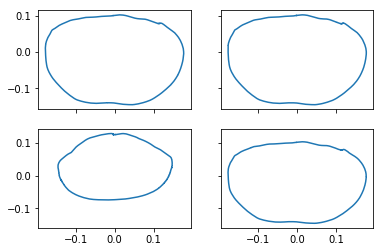

In [66]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(temp_vertex[0][:,0],temp_vertex[0][:,1],"-")

ax2.plot(temp_vertex[1][:,0],temp_vertex[1][:,1],"-")

ax3.plot(temp_vertex[-1][:,0],temp_vertex[-1][:,1],"-")

ax4.plot(temp_vertex[3][:,0],temp_vertex[3][:,1],"-")

plt.show()

In [67]:
fetas_outl = np.array(indi_values)

In [68]:
del indi_values

In [69]:
fetas_outl.shape

(111, 680712)

In [70]:
p = fetas_outl.reshape(111,fetas_outl.shape[1]//2,2)

In [71]:
del fetas_outl

In [72]:
p.shape

(111, 340356, 2)

In [73]:
from scipy.spatial import procrustes

In [74]:
pcentro = p.mean(0)

In [75]:
procrusteados = []
for p1 in p:
    mtx1,mtx2, disparity = procrustes(pcentro,p1)
    procrusteados.append(mtx2)
    #print(round(disparity))

In [76]:
np.shape(procrusteados)

(111, 340356, 2)

In [77]:
p = procrusteados[6]

In [78]:
del p

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [80]:
#ids = ["002","004","001","005","006","009","010","011","012","013","015","016","017","018","019","020","021","024","025","026","028","030","033","034","035","036","038","039","041","042","043","044","045","046","047","048","049","050","051","052","053","054","055","056","058","059","061","062","063","064","065","067","069","070","071","073","074","075","076","078","079","080","081","082","084","085","086","087","088","089","090","091","092","094","097","098","100","101","103","104","105","106","107","108","110","112","113","114","115","117","118","120","121","122","123","124","125","127","128","130","135","136","137","138","139","141","142","143","145","146","147","148","149","150","151","153","154"]
#ids = ["002","004","001","005","006","009","010","011","012","013","015","016","017","018","019","020","021","024","025","026","028","030","033","034","035","036","038","039","041","042","043","044","045","046","047","048","049","050","051","052","053","054","055","056","058","059","061","063","064","065","067","069","070","071","073","074","075","078","079","080","081","082","084","085","086","087","088","089","090","091","092","094","097","098","100","101","103","104","105","106","107","110","112","113","114","115","117","118","120","121","122","123","124","125","127","128","130","135","136","137","138","139","141","142","143","145","146","147","148","150","151","153","154"]

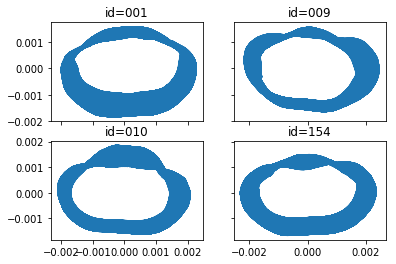

In [81]:
import matplotlib.patches as mpatches

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(procrusteados[0][:,0],procrusteados[0][:,1],"-")
ax1.set_title("id="+ids[0])
ax2.plot(procrusteados[5][:,0],procrusteados[5][:,1],"-")
ax2.set_title("id="+ids[5])
ax3.plot(procrusteados[6][:,0],procrusteados[6][:,1],"-")
ax3.set_title("id="+ids[6])
ax4.plot(procrusteados[-1][:,0],procrusteados[-1][:,1],"-")
ax4.set_title("id="+ids[-1])

# ax1.plot(x, y)
# ax1.set_title('Sharing x per column, y per row')
# ax2.scatter(x, y)
# ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# ax4.plot(x, 2 * y ** 2 - 1, color='r')

#plt.plot(procrusteados[0][:,0],procrusteados[0][:,1],"-")
#plt.plot(procrusteados[5][:,0],procrusteados[5][:,1],"-")
#plt.plot(procrusteados[6][:,0],procrusteados[6Los voluntarios fueron escaneados utilizando ropa deportiva mediante un escáner 3D comercial “The Structure Sensor”

El presente análisis fue realizado sobre scans 3D obtenidos de voluntarios en Puerto Madryn (aprobación ética nro 010/16 - Hospital Ísola). Los voluntarios fueron escaneados utilizando ropa deportiva mediante un escáner 3D comercial “The Structure Sensor”, de la cual se obtuvieron 150 reconstrucciones (86 mujeres, 24 varones, edad promedio XX +/- XX) con datos antropométricos asociados.][:,1],"-")
plt.show()

In [82]:
fetas_outl = np.array(procrusteados)

In [83]:
del procrusteados

In [84]:
fetas_outl =fetas_outl.reshape(fetas_outl.shape[0],fetas_outl.shape[1]*2)

In [85]:
from sklearn import decomposition

In [86]:
fetas_outl.shape

(111, 680712)

In [45]:
#ddf = pd.DataFrame(fetas_outl)
#ddf.to_csv("out_energy/fetas_outl.csv")

In [46]:
#ddf = pd.read_csv("out_energy/fetas_outl.csv")

In [47]:
#ddf

In [ ]:
decomposition.PCA?

In [87]:
pca = decomposition.PCA(n_components=50,svd_solver='randomized')
pca.fit(fetas_outl)
print("Con n_components = {} el valor es: {} ".format(50,pca.explained_variance_ratio_.sum()))

Con n_components = 50 el valor es: 0.8266701454465377 


In [88]:
x_out = pca.transform(fetas_outl)
x_out.shape

(111, 50)

In [89]:
pca.explained_variance_ratio_

array([ 0.15187744,  0.10934592,  0.06672537,  0.04218174,  0.03093869,
        0.02932244,  0.02383732,  0.02320124,  0.0189393 ,  0.01655436,
        0.01573031,  0.01468149,  0.01430286,  0.01389794,  0.01288512,
        0.01220062,  0.0112849 ,  0.01081295,  0.0104531 ,  0.00973991,
        0.00955021,  0.00912763,  0.00880292,  0.0084058 ,  0.0080633 ,
        0.00804236,  0.00764069,  0.00734406,  0.00724809,  0.0070555 ,
        0.006602  ,  0.00628183,  0.00623532,  0.00614598,  0.00604168,
        0.00594566,  0.00584129,  0.00560634,  0.00553861,  0.00534164,
        0.00521222,  0.00508782,  0.00503478,  0.00486775,  0.00468279,
        0.00464199,  0.00442497,  0.00439237,  0.0043342 ,  0.00421734])

In [51]:
del pca

In [90]:
#ddf = pd.DataFrame(x_out,index=ids)
#ddf.to_csv("out_energy/pca_total.csv")

In [91]:
ids_utilizados = map(lambda x: int(x),ids)

In [92]:
data = pd.read_excel("./planilla_colecta.xlsx")
#data = data[data['id'].isin(ids_utilizados)]

In [93]:
data = data[data['id'].isin(ids_utilizados)]

In [94]:
def bmi_cal(bmi):
    if 18.5 > bmi:
        return "underfat"
    if 18.5 <= bmi < 25:
        return "healthy"
    if 25 <= bmi < 30:
        return "overfat"
    if 30 <= bmi:
        return "obese"

In [95]:
sexo = data["sexo"].iloc[:].tolist() 
body_fat_range = data["Body fat range"].iloc[:].tolist() 
peso = data["peso"].iloc[:].tolist() 
altura = data["promedio altura"].iloc[:].tolist() 

In [96]:
altura = np.array(altura)/100

In [99]:
bmis = list(map( lambda pa: bmi_cal(pa[0] / (pa[1]*pa[1]))  ,zip(peso,altura)))

In [100]:
interest_feat = range(10)
data = pd.DataFrame(x_out)
data["labels"]= bmis
color_wheel = {"healthy": "red", "obese": "blue","overfat":"green","underfat":"black","desconocido":"yellow"}
colors = data["labels"].map(lambda x: color_wheel.get(x.lower()))
#pd.scatter_matrix(data.loc[:,interest_feat[:-1]], figsize=(12,8), diagonal='kde',label=data.loc[:,"labels"],c=colors)
#pd.scatter_matrix(data.loc[:,interest_feat[:-1]], figsize=(12,8), diagonal='kde')
#plt.show()

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


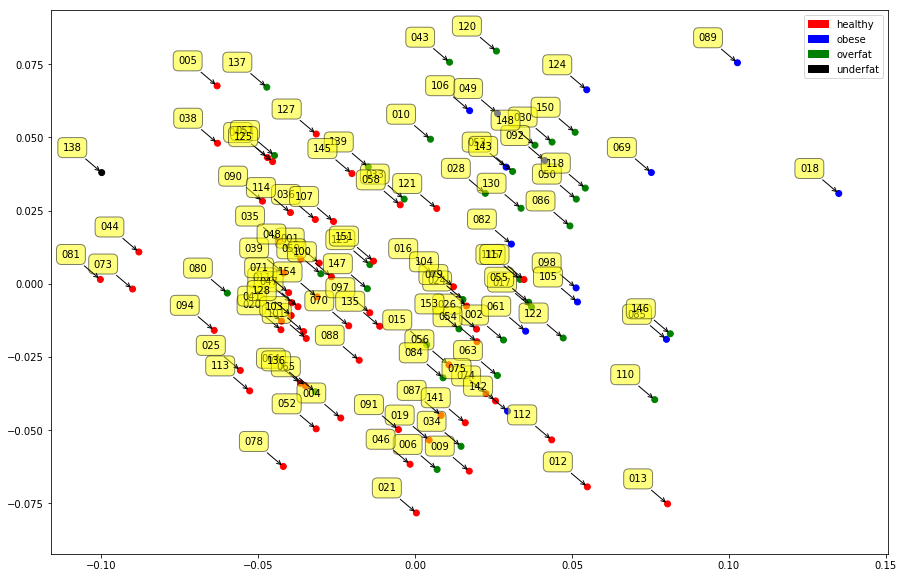

In [101]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=colors,marker="o")

red_patch = mpatches.Patch(color='red', label='healthy')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='obese')
black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(np.array(sorted(ids)), x_out[:,0], x_out[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

In [102]:
sex = {"f":"red","m":"blue"}
sex_label = list(map(lambda x: sex.get(x[0]),sexo))

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


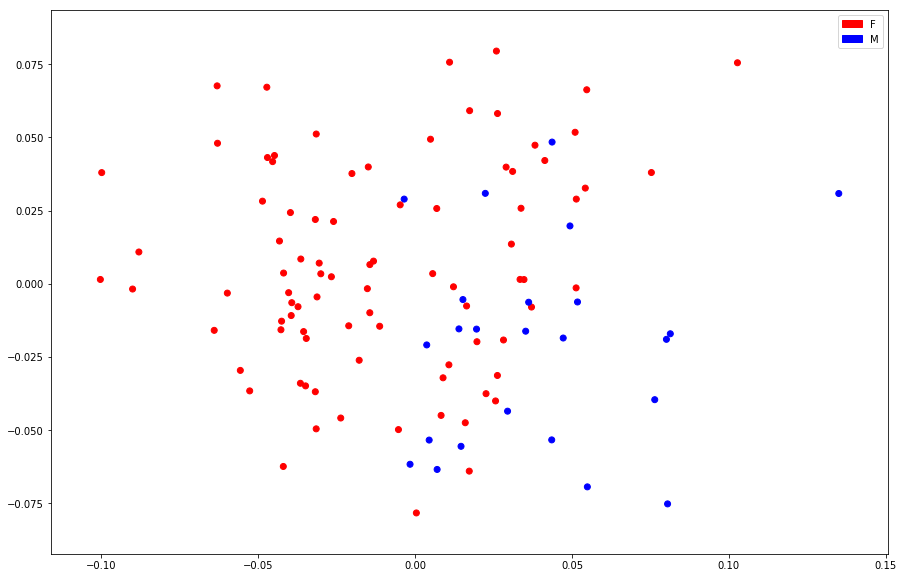

In [103]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=sex_label,marker="o")

red_patch = mpatches.Patch(color='red', label='F')
#green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='M')
#black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Indice Cintura-Cadera

In [ ]:
data = pd.read_excel("./planilla_colecta.xlsx")
data = data[data['id'].isin(ids_utilizados)]

In [ ]:
cint = np.array(data["promedio cir cin"])
cad  = np.array(data["promedio cir cad"])

In [ ]:
data

In [ ]:
ind_cint_cad = cint/cad

In [ ]:
ind_cint_cad

In [ ]:
colors_icc = []
for i,s,_id in zip (ind_cint_cad,sexo,ids_utilizados):
    if s == 'f':
        if i>0.71 and i < 0.84:
            print "normal-f"
            colors_icc.append("green")
        elif i<0.71:
            print "bajo-f"
            colors_icc.append("yellow")
        elif i > 0.84:
            print "alto-f"
            colors_icc.append("red")
    else:
        if i>0.78 and i < 0.94:
            print "normal-m"
            colors_icc.append("green")
        elif i<0.78:
            print "bajo-m"
            colors_icc.append("yellow")
        elif i > 0.94:
            print "alto-m"
            colors_icc.append("red")

In [ ]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=colors_icc,marker="o")

red_patch = mpatches.Patch(color='green', label='Normal')
#green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='red', label='Alto')
#black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Indice Talla Cintura

In [ ]:
altura  = np.array(data["promedio altura"])

In [ ]:
ict = cint/altura

In [ ]:
altura

In [ ]:
ict

In [ ]:
89.73 * ict - 15,40

In [ ]:
data.columns

In [ ]:
np.array(data["Body fat%"])

In [ ]:
colors_ict = []
for i,s,_id in zip (ict,sexo,ids_utilizados):
    if s == 'f':
        if i > 0.47 and i < 0.50 :
            colors_ict.append("green")
        elif i > 0.57 :
            colors_ict.append("blue")
        else: 
            colors_ict.append("red")
    else:
        if i > 0.48 and i < 0.51:
            colors_ict.append("green")
        elif i > 0.57 :
            colors_ict.append("blue")
        else: 
            colors_ict.append("red")
         

In [ ]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=colors_ict,marker="o")

red_patch = mpatches.Patch(color='red', label='Normal')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='Obeso')
#black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Hombres

In [104]:
fetas_outl.shape

(111, 680712)

In [107]:
id_sexo_h = {"f": False, "m": True}
class_sexo_h = list(map(lambda x: id_sexo_h.get(x[0]),sexo))

In [108]:
subset_hombres = fetas_outl[np.array(class_sexo_h)]

In [111]:
pca_h = decomposition.PCA(n_components=12,svd_solver='randomized')
pca_h.fit(subset_hombres)
print ("Con n_components = {} el valor es: {}".format(12,pca_h.explained_variance_ratio_.sum()))

Con n_components = 12 el valor es: 0.7799472539388678


In [115]:
x_out_h = pca_h.transform(subset_hombres)
x_out_h.shape

(24, 12)

In [116]:
#ddf = pd.DataFrame(x_out_h,index=np.array(ids)[np.array(class_sexo_h)])
#ddf.to_csv("out_energy/pca_hombres.csv")

In [113]:
data = pd.DataFrame(x_out_h)
#data["labels"]= bmis
data["labels"]= np.array(bmis)[np.array(class_sexo_h)]
color_wheel = {"healthy": "red", "obese": "blue","overfat":"green","underfat":"black","desconocido":"yellow"}
colors = data["labels"].map(lambda x: color_wheel.get(x.lower()))

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


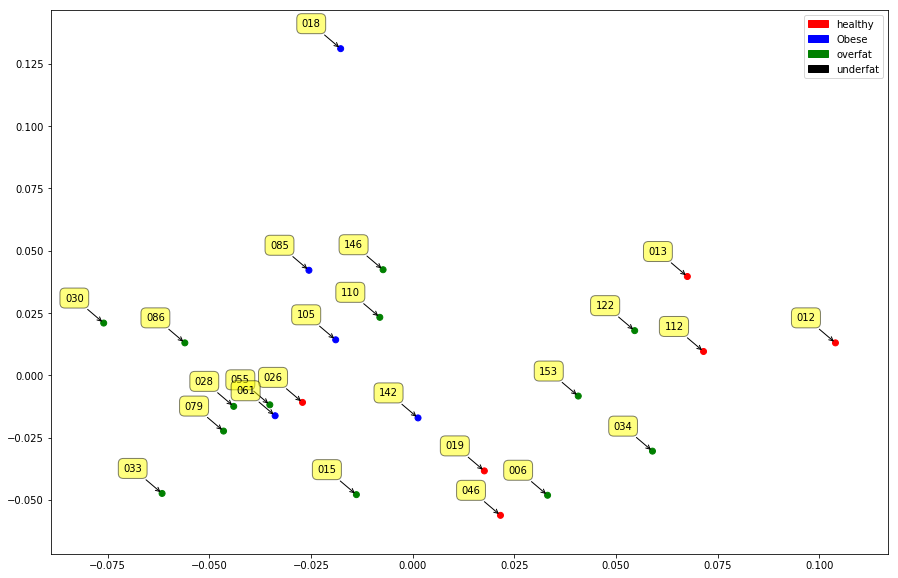

In [114]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out_h[:,0],x_out_h[:,1],c=colors,marker="o")

red_patch = mpatches.Patch(color='red', label='healthy')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='Obese')
black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(np.array(ids)[np.array(class_sexo_h)], x_out_h[:,0], x_out_h[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.legend(loc='best')

plt.show()

# Mujeres

In [117]:
id_sexo_f = {"f": True, "m": False}
class_sexo_f = list(map(lambda x: id_sexo_f.get(x[0]),sexo))

In [118]:
subset_mujeres = fetas_outl[np.array(class_sexo_f)]

In [119]:
del fetas_outl

In [122]:
pca_h = decomposition.PCA(n_components=35,svd_solver='randomized')
pca_h.fit(subset_mujeres)
print ("Con n_components = {} el valor es: {} ".format(35,pca_h.explained_variance_ratio_.sum()))

Con n_components = 35 el valor es: 0.7743674965049289 


In [123]:
import matplotlib.patches as mpatches

In [124]:
x_out_m = pca_h.transform(subset_mujeres)
x_out_m.shape

(87, 35)

In [125]:
data = pd.DataFrame(x_out_m)
#data["labels"]= bmis
data["labels"]= np.array(bmis)[np.array(class_sexo_f)]
color_wheel = {"healthy": "red", "obese": "blue","overfat":"green","underfat":"black","desconocido":"yellow"}
colors = data["labels"].map(lambda x: color_wheel.get(x.lower()))

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


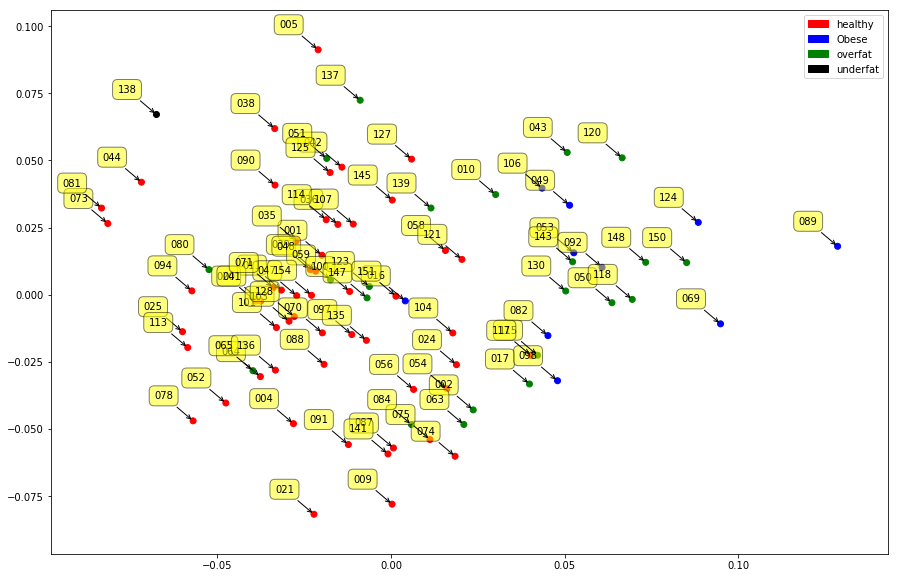

In [127]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out_m[:,0],x_out_m[:,1],c=colors,marker="o")

red_patch = mpatches.Patch(color='red', label='healthy')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='Obese')
black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(np.array(ids)[np.array(class_sexo_f)], x_out_m[:,0], x_out_m[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

In [128]:
ddf = pd.DataFrame(x_out_m,index=np.array(ids)[np.array(class_sexo_f)])
ddf.to_csv("out_energy/pca_mujeres.csv")

In [134]:
np.array(ids)[np.array(class_sexo_h)]

array(['006', '012', '013', '015', '018', '019', '026', '028', '030',
       '033', '034', '046', '055', '061', '079', '085', '086', '105',
       '110', '112', '122', '142', '146', '153'], 
      dtype='<U3')

# Prediciendo

In [ ]:
import sklearn
from sklearn.svm import SVC

In [ ]:
id_bmi = {"healthy": 0, "obese": 1, "underfat":0, "overfat": 1}
bmi_c = data["labels"].map(lambda x: id_bmi.get(x)).tolist()

In [ ]:
X = x_out
y = bmi_c

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, test_size=0.30, random_state=42)

In [ ]:
clf = SVC()
clf.fit(X_train, y_train) 

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
clf = ExtraTreesClassifier(n_estimators=200,
                           max_features=0.3,
                           #max_depth=4, #20
                           random_state=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print classification_report(y_test, y_pred)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
scores.mean()

In [ ]:
scores.std()

In [ ]:
scores

## Clustering

In [ ]:
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=1,precompute_distances=False,max_iter=300)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [ ]:
n_clusters = 2

In [ ]:
fig = plt.figure(figsize=(8, 3))
#fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
fig = plt.figure()
ax = fig.add_subplot(111)
colors1 = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
#mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
#mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
#order = pairwise_distances_argmin(k_means_cluster_centers,
                                 # mbk_means_cluster_centers)

# KMeans
#ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors1):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.', markersize=15)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=8)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
#plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
  #  t_batch, k_means.inertia_))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.show()